This notebook runs various solvers for a single step and dumps out some variables -- it is intended for unit testing.

At the moment, it is required to be at the top-level `pyro/` directory, because not all the functions find pyro's home directory on their own.

In [1]:
import pyro

## advection

In [2]:
solver = "advection"
problem_name = "smooth"
param_file = "inputs.smooth"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the smooth advection problem...
    1    0.10000    0.10000
outputting...
main:  0.5842185020446777
   vis:  0.2792541980743408


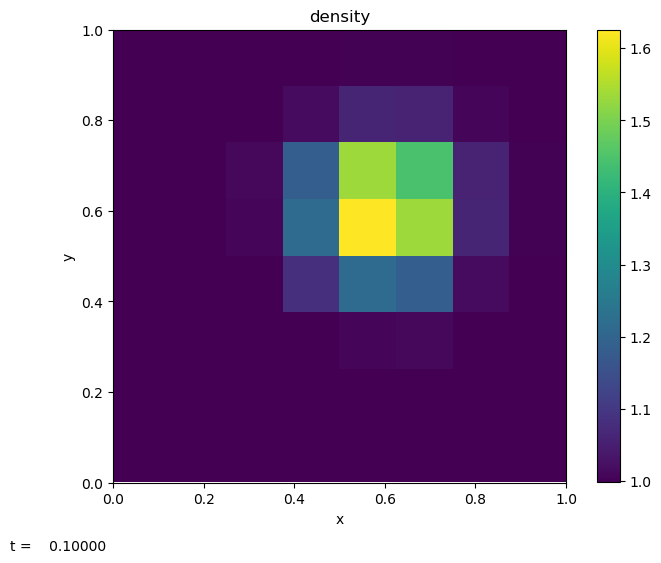

In [3]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [4]:
dens = sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         1         1         1    1.0004    1.0014    1.0013    1.0002         1 
         1         1    1.0003    1.0162    1.0626    1.0579    1.0077    1.0002 
         1    1.0002    1.0116     1.185    1.5348    1.4466    1.0579    1.0013 
         1    1.0001    1.0064    1.2169    1.6258    1.5348    1.0626    1.0014 
         1   0.99994    0.9985     1.085    1.2169     1.185    1.0162    1.0004 
         1   0.99995   0.99797    0.9985    1.0064    1.0116    1.0003         1 
         1         1   0.99995   0.99994    1.0001    1.0002         1         1 
         1         1         1         1         1         1         1         1 

         ^ y
         |
         +---> x
        


## compressible

In [5]:
solver = "compressible"
problem_name = "rt"
param_file = "inputs.rt"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=24", "driver.verbose=0"]

pyro ...
initializing the rt problem...


/home/zingale/development/pyro2/compressible/problems/rt.py:72: RuntimeWarning: invalid value encountered in true_divide
  0.5*(xmom[:,:]**2 + ymom[:,:]**2)/dens[:,:]
/home/zingale/development/pyro2/compressible/simulation.py:59: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iu] = U[:, :, ivars.ixmom]/U[:, :, ivars.idens]
/home/zingale/development/pyro2/compressible/simulation.py:60: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iv] = U[:, :, ivars.iymom]/U[:, :, ivars.idens]


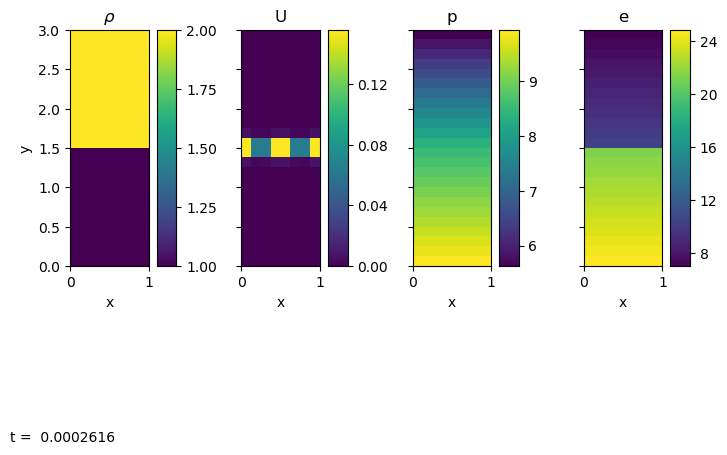

In [6]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [7]:
dens = sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
    2.0004    2.0002    1.9999    1.9997    1.9997    1.9999    2.0002    2.0004 
         2         2    1.9999    1.9997    1.9997    1.9999         2         2 
   0.99984   0.9

## diffusion

In [8]:
solver = "diffusion"
problem_name = "gaussian"
param_file = "inputs.gaussian"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the Gaussian diffusion problem...

          The solution can be compared to the analytic solution with
          the script analysis/gauss_diffusion_compare.py
          


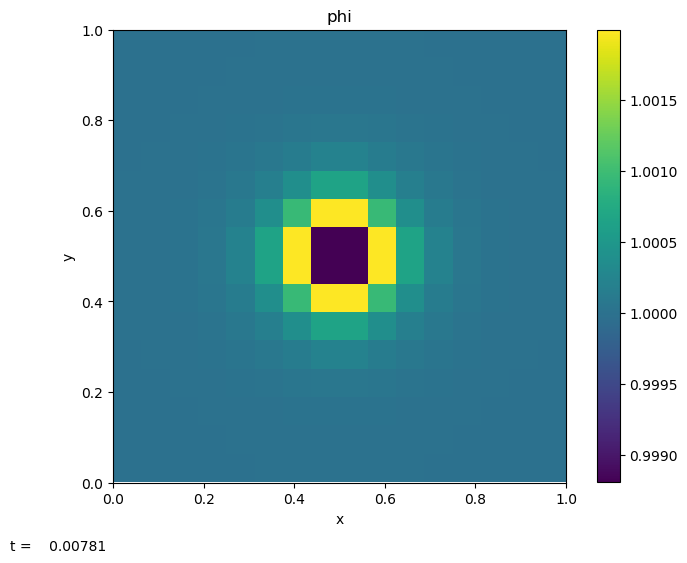

In [9]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [10]:
dens = sim.cc_data.get_var("phi")
dens.pretty_print(show_ghost=False)

         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1    1.0001    1.0001    1.0001    1.0001         1         1         1         1         1         1 
         1         1         1         1         1    1.0001    1.0001    1.0002    1.0002    1.0001    1.0001         1         1         1         1         1 
         1         1         1         1    1.0001    1.0002    1.0004    1.0007    1.0007    1.0004    1.0002    1.0001         1         1         1         1 
         1         1        

## incompressible

In [11]:
solver = "incompressible"
problem_name = "shear"
param_file = "inputs.shear"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the incompressible shear problem...
y_half =  0.5
delta_s =  0.05
rho_s =  42.0
extrema:  -1.0 0.9999997110039925


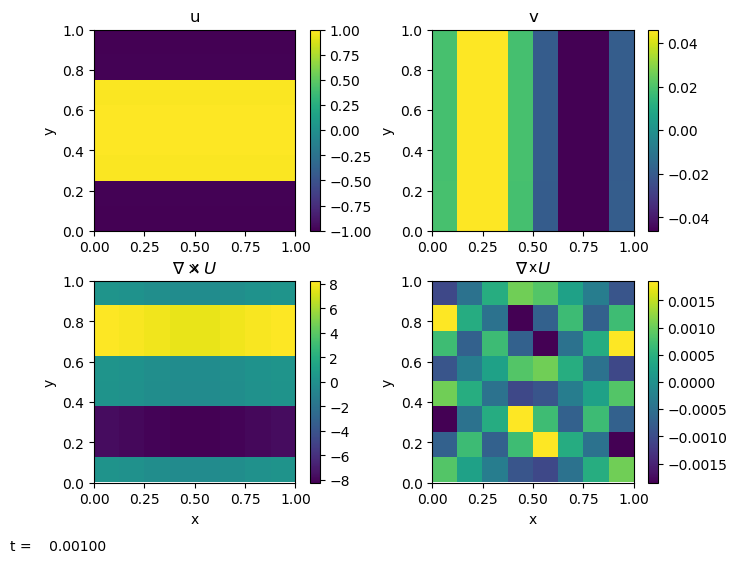

In [12]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [13]:
u = sim.cc_data.get_var("x-velocity")
u.pretty_print(show_ghost=False)

        -1   -1.0001   -1.0001        -1  -0.99995  -0.99992  -0.99992  -0.99995 
  -0.98937  -0.98915  -0.98915  -0.98937   -0.9894  -0.98929  -0.98929   -0.9894 
    0.9894   0.98929   0.98929    0.9894   0.98937   0.98915   0.98915   0.98937 
   0.99995   0.99992   0.99992   0.99995         1    1.0001    1.0001         1 
         1    1.0001    1.0001         1   0.99995   0.99992   0.99992   0.99995 
   0.98937   0.98915   0.98915   0.98937    0.9894   0.98929   0.98929    0.9894 
   -0.9894  -0.98929  -0.98929   -0.9894  -0.98937  -0.98915  -0.98915  -0.98937 
  -0.99995  -0.99992  -0.99992  -0.99995        -1   -1.0001   -1.0001        -1 

         ^ y
         |
         +---> x
        


## lm_atm

In [14]:
solver = "lm_atm"
problem_name = "bubble"
param_file = "inputs.bubble"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the bubble problem...


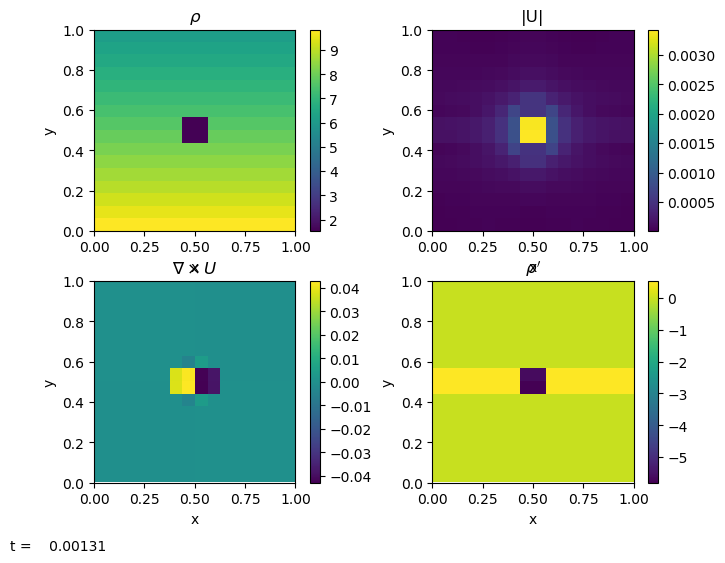

In [15]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [16]:
v = sim.cc_data.get_var("y-velocity")
v.pretty_print(show_ghost=False, fmt="%10.3g")

 -4.31e-05 -3.83e-05 -2.87e-05 -1.44e-05  3.88e-06  2.41e-05  4.25e-05  5.39e-05  5.39e-05  4.25e-05  2.41e-05  3.88e-06 -1.44e-05 -2.87e-05 -3.83e-05 -4.31e-05 
  -4.7e-05 -4.23e-05 -3.28e-05  -1.8e-05  1.86e-06  2.54e-05  4.86e-05  6.42e-05  6.42e-05  4.86e-05  2.54e-05  1.86e-06  -1.8e-05 -3.28e-05 -4.23e-05  -4.7e-05 
 -5.51e-05 -5.09e-05 -4.18e-05 -2.65e-05 -3.73e-06  2.69e-05  6.19e-05  8.92e-05  8.92e-05  6.19e-05  2.69e-05 -3.73e-06 -2.65e-05 -4.18e-05 -5.09e-05 -5.51e-05 
 -6.73e-05  -6.4e-05 -5.65e-05 -4.22e-05 -1.69e-05  2.42e-05  8.24e-05   0.00014   0.00014  8.24e-05  2.42e-05 -1.69e-05 -4.22e-05 -5.65e-05  -6.4e-05 -6.73e-05 
 -8.22e-05 -8.11e-05 -7.75e-05 -6.81e-05 -4.53e-05  4.76e-06  0.000103  0.000247  0.000247  0.000103  4.76e-06 -4.53e-05 -6.81e-05 -7.75e-05 -8.11e-05 -8.22e-05 
 -9.77e-05 -9.99e-05 -0.000104 -0.000106 -9.99e-05 -6.11e-05  7.66e-05  0.000492  0.000492  7.66e-05 -6.11e-05 -9.99e-05 -0.000106 -0.000104 -9.99e-05 -9.77e-05 
 -6.65e-05 -7.26e-05 -8.57e-